Test notebook

In [1]:
# Dependencies and Setup
import missingno as msno

import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
import sys
import json
import requests

DNPAO_df = pd.read_csv('DNPAO_all.csv')
DNPAO_df.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
1,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
2,2011,2011,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(41.708280193, -71.522470314)",OWS,OWS1,Q036,VALUE,44,Race/Ethnicity,Other,RACE,RACEOTH
3,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
4,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


<Axes: >

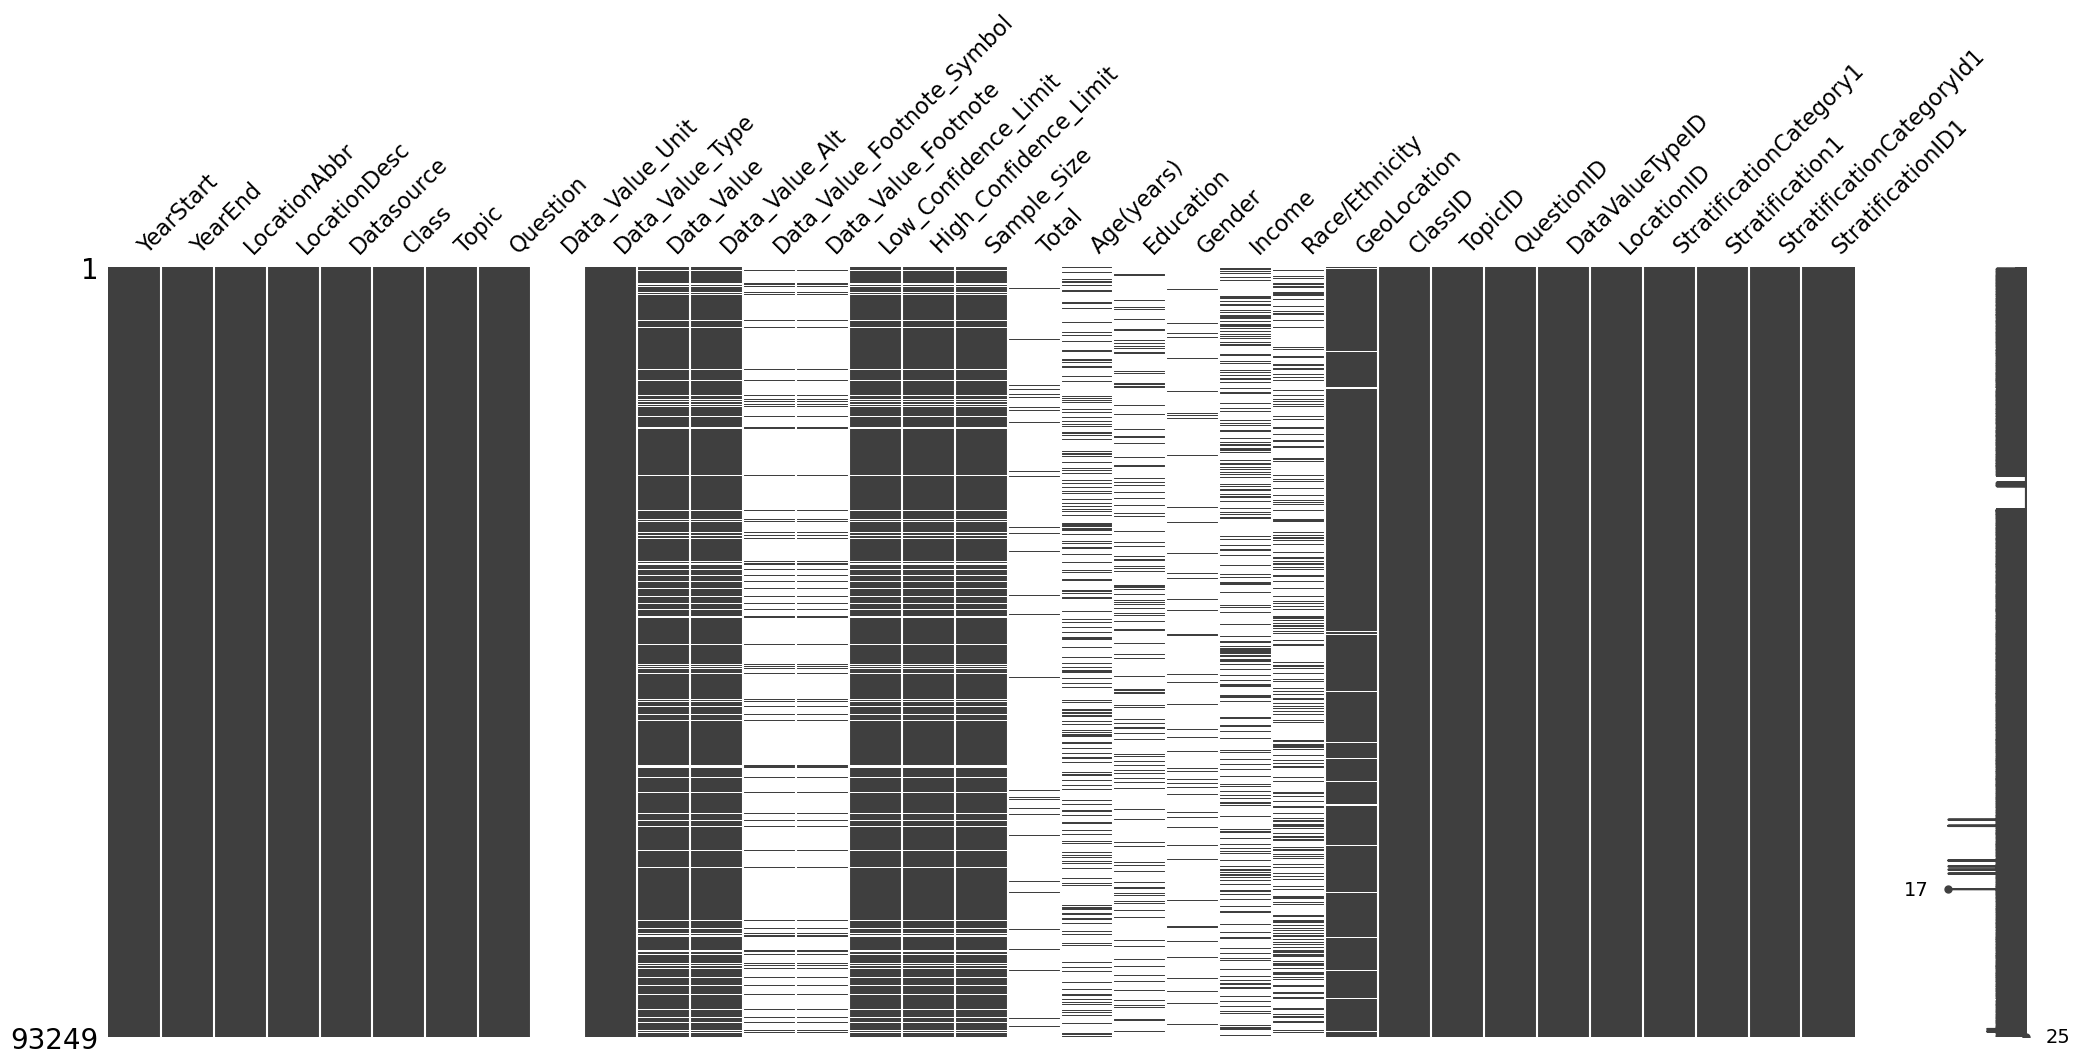

In [2]:
%matplotlib inline
msno.matrix(DNPAO_df)

# Import DNPAO_df.csv to database (SQLpostgres) for extracting the desired data, i.e., Q037/Q036 for year 2022 for Visualization

# VISUALIZATION FOR QUESTION 37

In [3]:
# Dependencies and Setup
import missingno as msno
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
import sys
import json
import requests

# Load the data file, read and display it with Pandas
q037_data = Path("Q037.csv")

# Read and store into Pandas DataFrames
q037_df = pd.read_csv(q037_data)
q037_df.head()

/var/folders/vf/fx_p1h7d1tz18tzk1bj4b9nw0000gn/T/ipykernel_59160/3339273294.py:19: DtypeWarning: Columns (17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  q037_df = pd.read_csv(q037_data)


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2021,2021,FL,Florida,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,VALUE,12,Age (years),35 - 44,AGEYR,AGEYR3544
1,2021,2021,FL,Florida,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,VALUE,12,Age (years),65 or older,AGEYR,AGEYR65PLUS
2,2021,2021,FL,Florida,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,VALUE,12,Age (years),18 - 24,AGEYR,AGEYR1824
3,2021,2021,FL,Florida,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,VALUE,12,Age (years),55 - 64,AGEYR,AGEYR5564
4,2021,2021,FL,Florida,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,VALUE,12,Age (years),25 - 34,AGEYR,AGEYR2534


In [4]:
q037_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [5]:
# Trim the columns of data to the one we need
q037_9cols = q037_df.drop(['YearEnd','Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID',
       'DataValueTypeID', 'LocationID'], axis=1)
# q037sevencols.to_csv("q037sevencols.csv", index=False)
q037_9cols

,YearStart,LocationAbbr,LocationDesc,Data_Value,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2021,FL,Florida,NaN,Q037,Age (years),35 - 44,AGEYR,AGEYR3544
1,2021,FL,Florida,NaN,Q037,Age (years),65 or older,AGEYR,AGEYR65PLUS
2,2021,FL,Florida,NaN,Q037,Age (years),18 - 24,AGEYR,AGEYR1824
3,2021,FL,Florida,NaN,Q037,Age (years),55 - 64,AGEYR,AGEYR5564
4,2021,FL,Florida,NaN,Q037,Age (years),25 - 34,AGEYR,AGEYR2534
...,...,...,...,...,...,...,...,...,...
18112,2021,WY,Wyoming,36.6,Q037,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
18113,2022,WY,Wyoming,29.2,Q037,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
18114,2022,WY,Wyoming,26.5,Q037,Race/Ethnicity,Hispanic,RACE,RACEHIS
18115,2022,WY,Wyoming,36.9,Q037,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT


In [6]:
#remove NA Data value
q037_9cols_cleaned = q037_9cols.dropna(subset=['Data_Value'])
q037_9cols_cleaned

,YearStart,LocationAbbr,LocationDesc,Data_Value,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
18,2016,AL,Alabama,35.3,Q037,Age (years),55 - 64,AGEYR,AGEYR5564
19,2018,AL,Alabama,31.9,Q037,Age (years),35 - 44,AGEYR,AGEYR3544
20,2018,AL,Alabama,30.4,Q037,Age (years),25 - 34,AGEYR,AGEYR2534
21,2018,AL,Alabama,38.6,Q037,Age (years),65 or older,AGEYR,AGEYR65PLUS
22,2018,AL,Alabama,35.6,Q037,Age (years),45 - 54,AGEYR,AGEYR4554
...,...,...,...,...,...,...,...,...,...
18111,2021,WY,Wyoming,51.4,Q037,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
18112,2021,WY,Wyoming,36.6,Q037,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
18113,2022,WY,Wyoming,29.2,Q037,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
18114,2022,WY,Wyoming,26.5,Q037,Race/Ethnicity,Hispanic,RACE,RACEHIS


In [7]:
q037_9cols_sorted = q037_9cols_cleaned.sort_values(by=['YearStart', 'StratificationCategory1', 'Stratification1', 'LocationDesc'])
q037_9cols_sorted

,YearStart,LocationAbbr,LocationDesc,Data_Value,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
57,2011,AL,Alabama,27.1,Q037,Age (years),18 - 24,AGEYR,AGEYR1824
124,2011,AK,Alaska,32.0,Q037,Age (years),18 - 24,AGEYR,AGEYR1824
216,2011,AZ,Arizona,27.7,Q037,Age (years),18 - 24,AGEYR,AGEYR1824
252,2011,AR,Arkansas,27.3,Q037,Age (years),18 - 24,AGEYR,AGEYR1824
347,2011,CA,California,26.8,Q037,Age (years),18 - 24,AGEYR,AGEYR1824
...,...,...,...,...,...,...,...,...,...
12891,2022,VA,Virginia,32.1,Q037,Total,Total,OVR,OVERALL
12903,2022,WA,Washington,34.6,Q037,Total,Total,OVR,OVERALL
12915,2022,WV,West Virginia,33.4,Q037,Total,Total,OVR,OVERALL
12927,2022,WI,Wisconsin,33.0,Q037,Total,Total,OVR,OVERALL


# Visualizations focus on Question 37 in a specific year, 2022

In [8]:
q037_2022 = q037_9cols_sorted.loc[q037_9cols_sorted["YearStart"] == 2022]
q037_2022

,YearStart,LocationAbbr,LocationDesc,Data_Value,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
85,2022,AL,Alabama,31.0,Q037,Age (years),18 - 24,AGEYR,AGEYR1824
156,2022,AK,Alaska,27.7,Q037,Age (years),18 - 24,AGEYR,AGEYR1824
233,2022,AZ,Arizona,22.7,Q037,Age (years),18 - 24,AGEYR,AGEYR1824
301,2022,AR,Arkansas,24.8,Q037,Age (years),18 - 24,AGEYR,AGEYR1824
376,2022,CA,California,25.4,Q037,Age (years),18 - 24,AGEYR,AGEYR1824
...,...,...,...,...,...,...,...,...,...
12891,2022,VA,Virginia,32.1,Q037,Total,Total,OVR,OVERALL
12903,2022,WA,Washington,34.6,Q037,Total,Total,OVR,OVERALL
12915,2022,WV,West Virginia,33.4,Q037,Total,Total,OVR,OVERALL
12927,2022,WI,Wisconsin,33.0,Q037,Total,Total,OVR,OVERALL


In [9]:
# Age
q037_2022_states_age = q037_2022.loc[q037_2022["StratificationCategoryId1"] == "AGEYR"]
q037_2022_states_age.to_csv("q037_2022_states_age.csv", index=False)

/Users/hatkiet/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


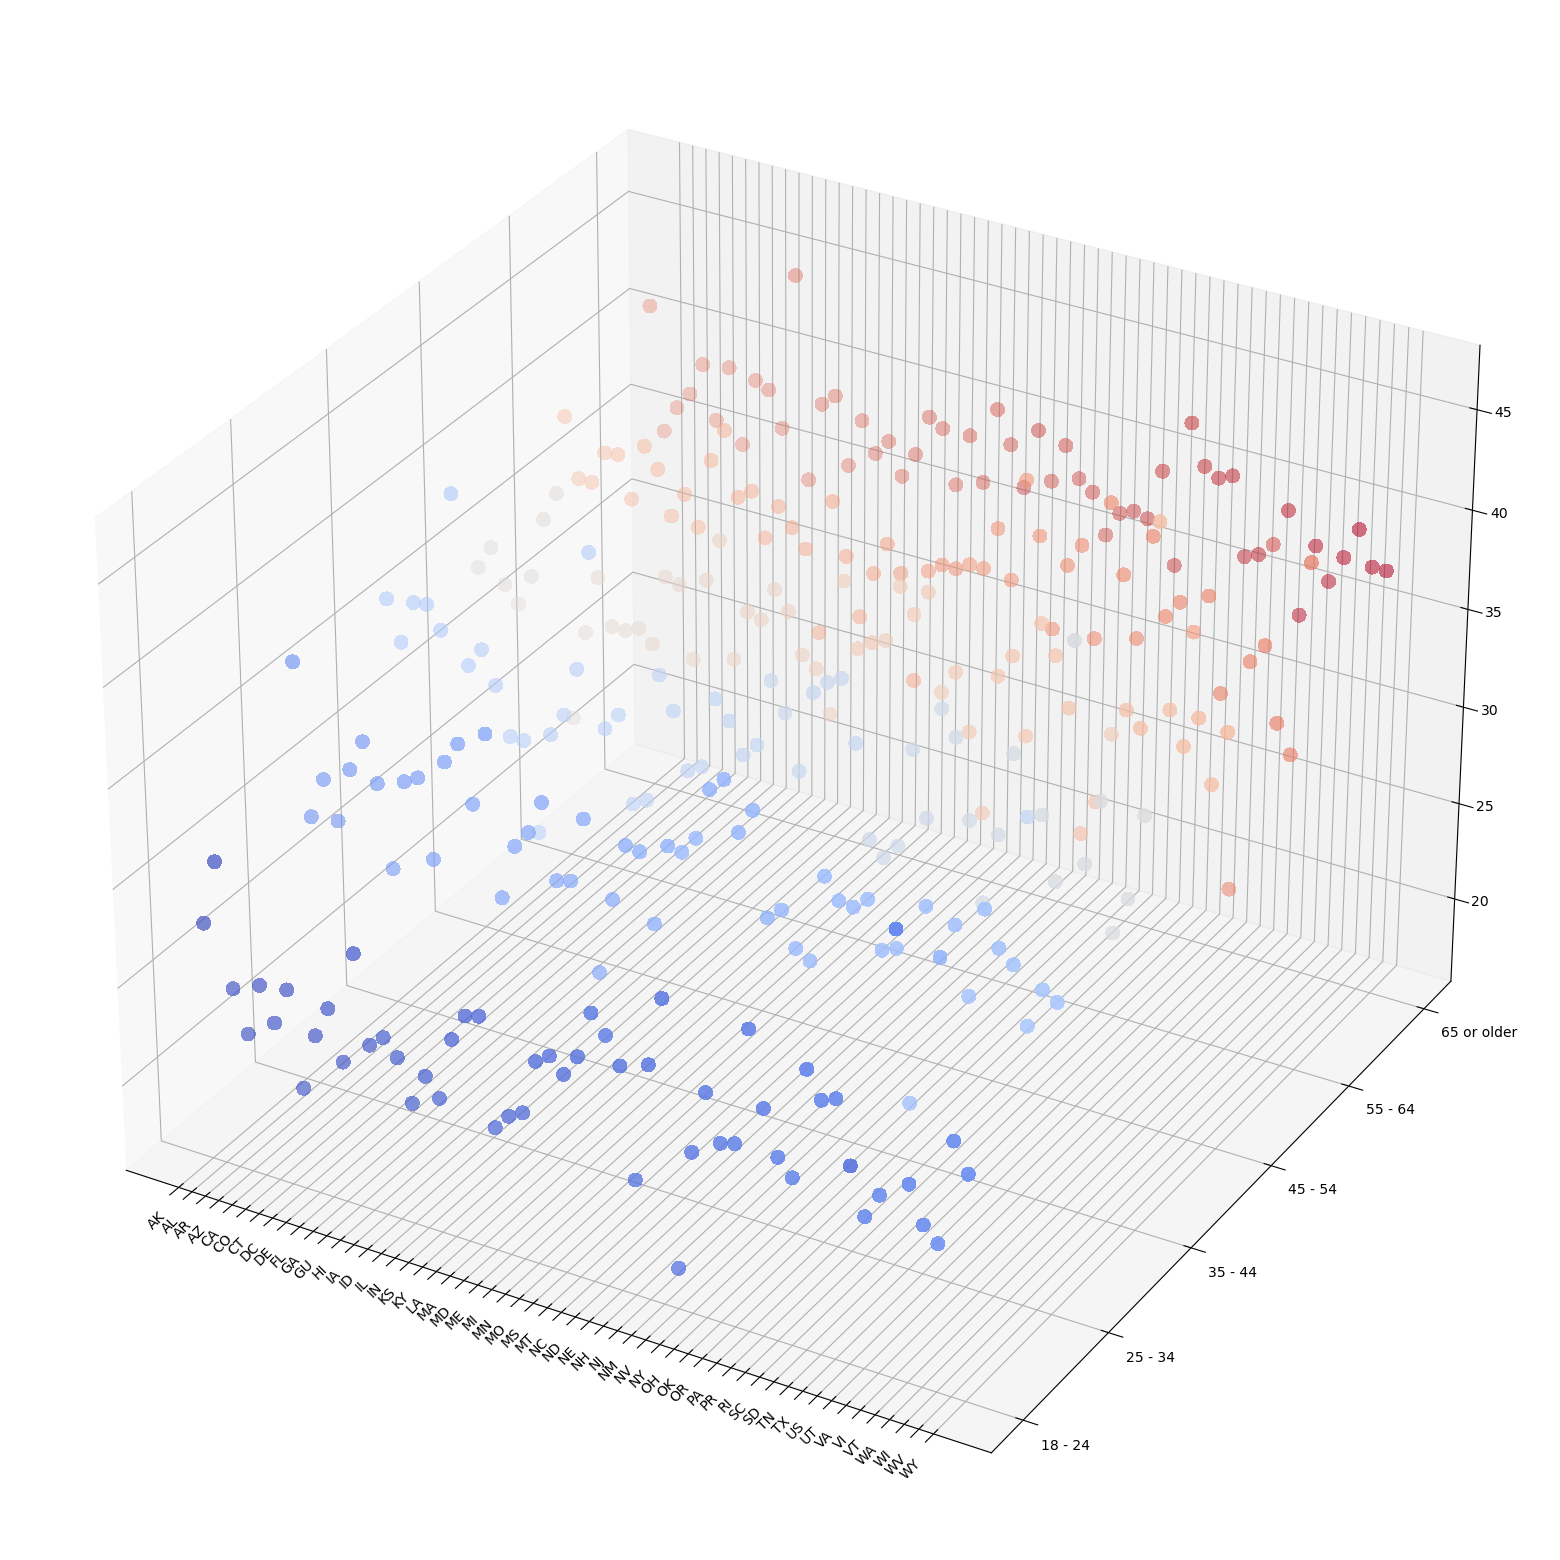

In [10]:
#3d Plot by HLee
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

age = np.unique(np.array(q037_2022_states_age['Stratification1']))
state = np.unique(np.array(q037_2022_states_age['LocationAbbr']))

XUniques, Xt = np.unique(q037_2022_states_age['LocationAbbr'], return_inverse=True)
YUniques, Yt = np.unique(q037_2022_states_age['Stratification1'], return_inverse=True)
Zt = q037_2022_states_age['Data_Value']

#figsize large due to state abbr, need another solution for prettiness, works for now, contrained isnt being applied
fig=plt.figure(figsize=(20,20),layout='constrained')
ax= fig.add_subplot(projection='3d')
#color function needs fix
ax.scatter(Xt, Yt, Zt, c=np.arange((len(state)*6)), cmap=cm.coolwarm, s=100,linewidth=0, antialiased=False)

ax.set_xticks(range(len(state)), labels=state, ha='right',rotation=45)
ax.set_yticks(range(len(age)), labels=age, ha='left')
plt.show()

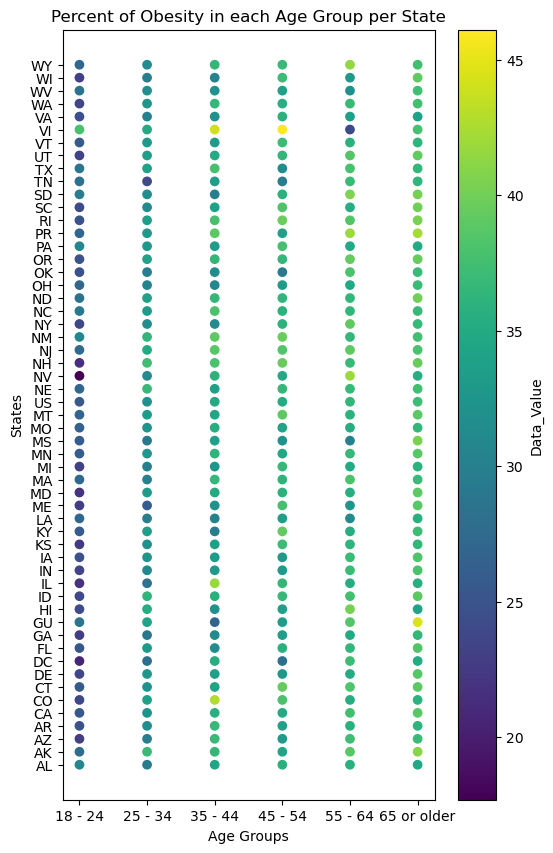

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 10))

# Create a scatter plot
plt.scatter(q037_2022_states_age["Stratification1"], q037_2022_states_age["LocationAbbr"], c=q037_2022_states_age["Data_Value"], cmap='viridis')

# Set labels and title
plt.xlabel('Age Groups')
plt.ylabel('States')
plt.title('Percent of Obesity in each Age Group per State')

# Add colorbar
plt.colorbar(label='Data_Value')

# Show the plot
plt.show()

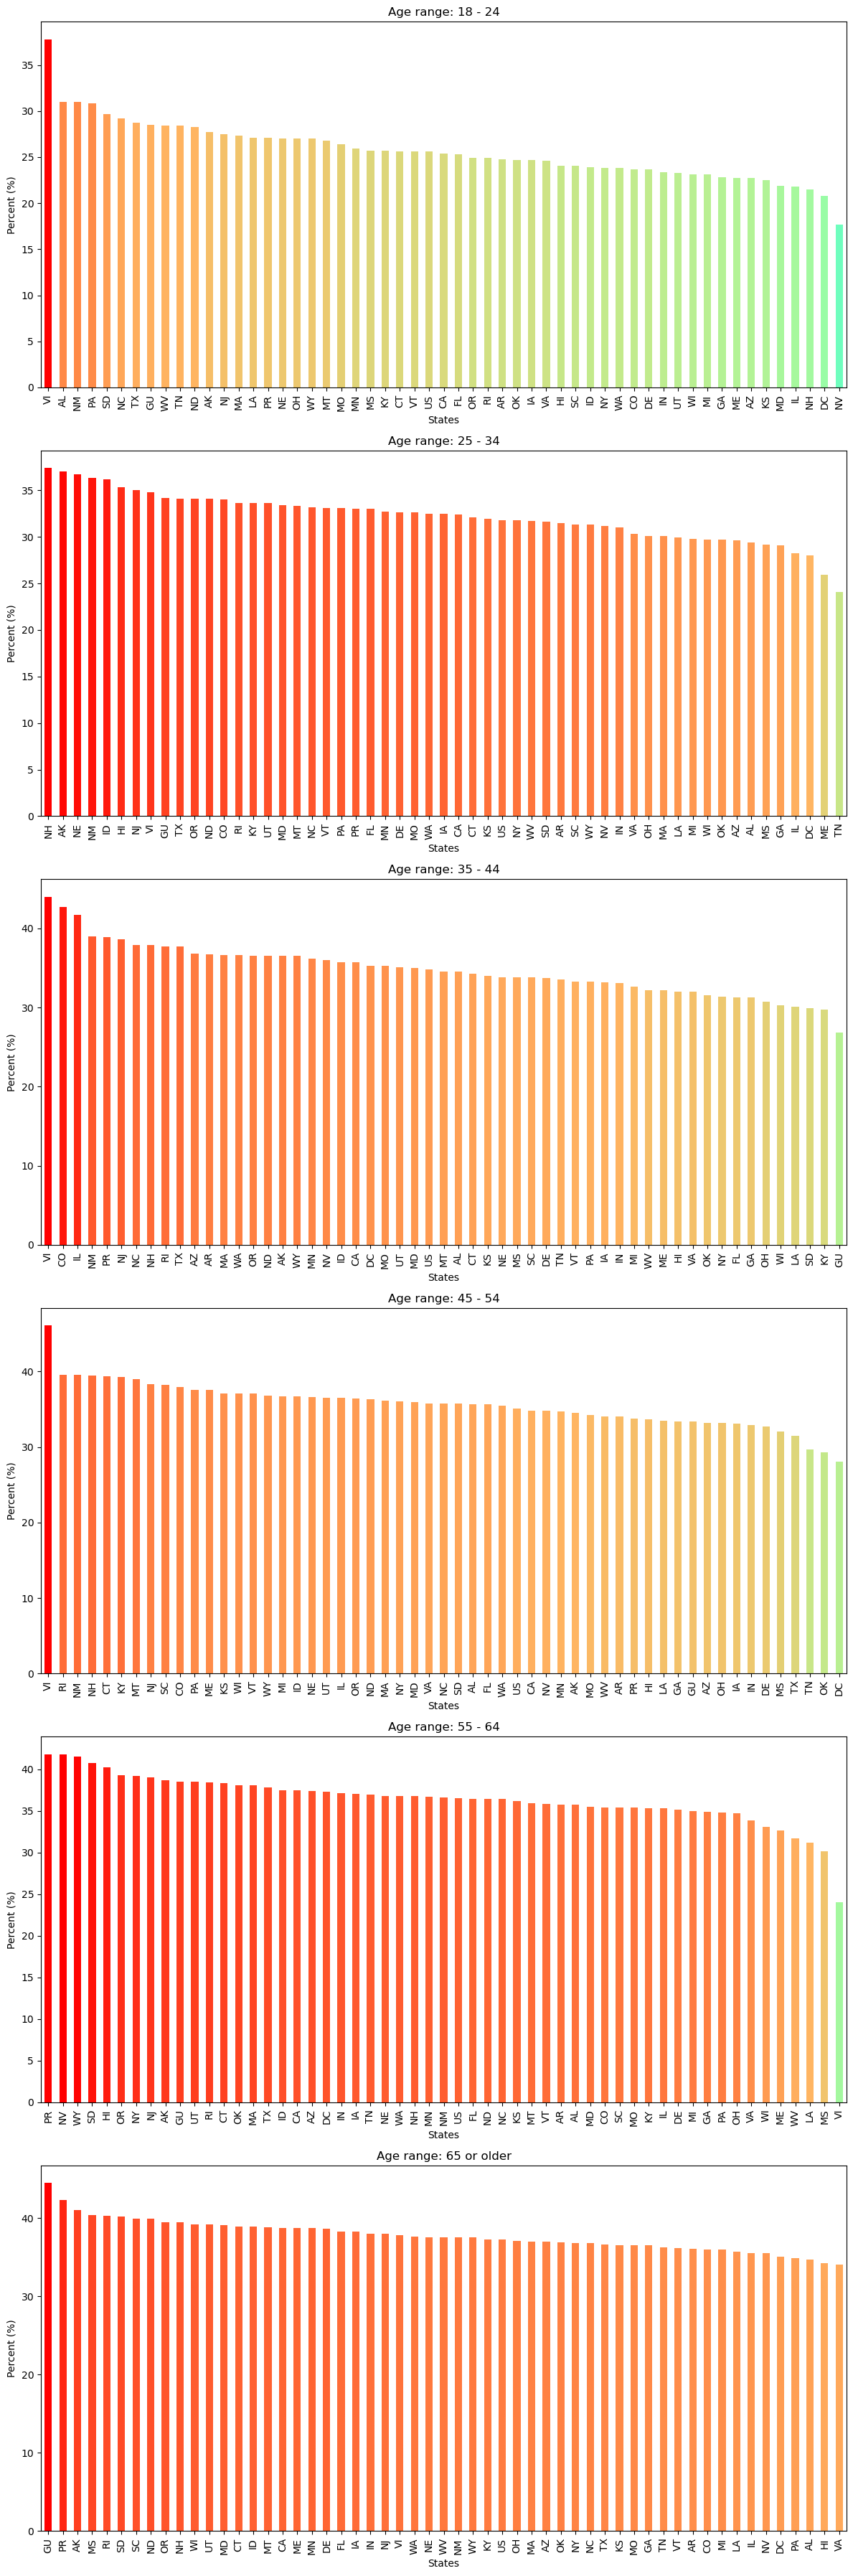

In [12]:
# Get unique values of age range
age_ranges = q037_2022_states_age["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(age_ranges)
num_cols = 1  # Each age range will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique age range
for i, age in enumerate(age_ranges):
    # Filter the DataFrame for the current age range
    filtered_data = q037_2022_states_age[q037_2022_states_age["Stratification1"] == age]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current age range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    colors = plt.cm.rainbow(grouped_data.values / max(grouped_data.values))  # Use rainbow colormap
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Age range: {age}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

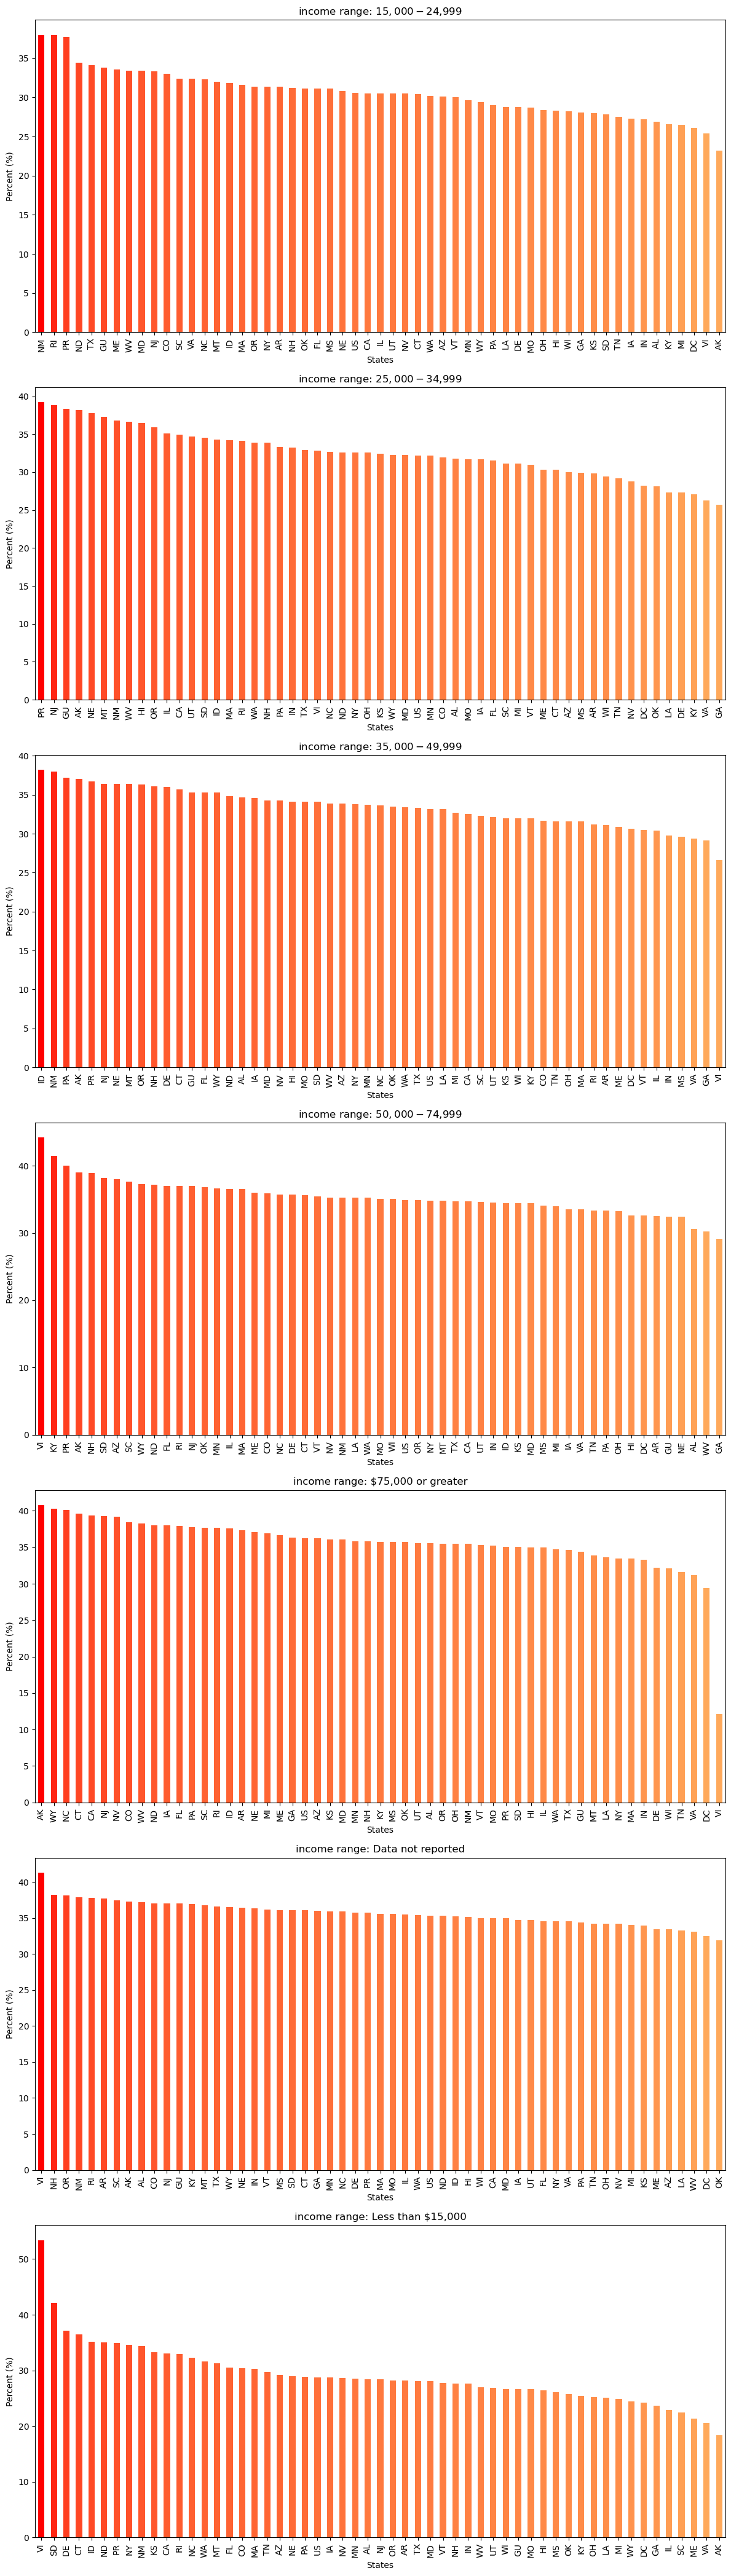

In [13]:
# Output 
q037_2022_states_income = q037_2022.loc[q037_2022["StratificationCategoryId1"] == "INC"]
q037_2022_states_income.to_csv("q037_2022_states_income.csv", index=False)

# Get unique values of income range
income_ranges = q037_2022_states_income["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(income_ranges)
num_cols = 1  # Each income range will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique income range
for i, income in enumerate(income_ranges):
    # Filter the DataFrame for the current income range
    filtered_data = q037_2022_states_income[q037_2022_states_income["Stratification1"] == income]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current income range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'income range: {income}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

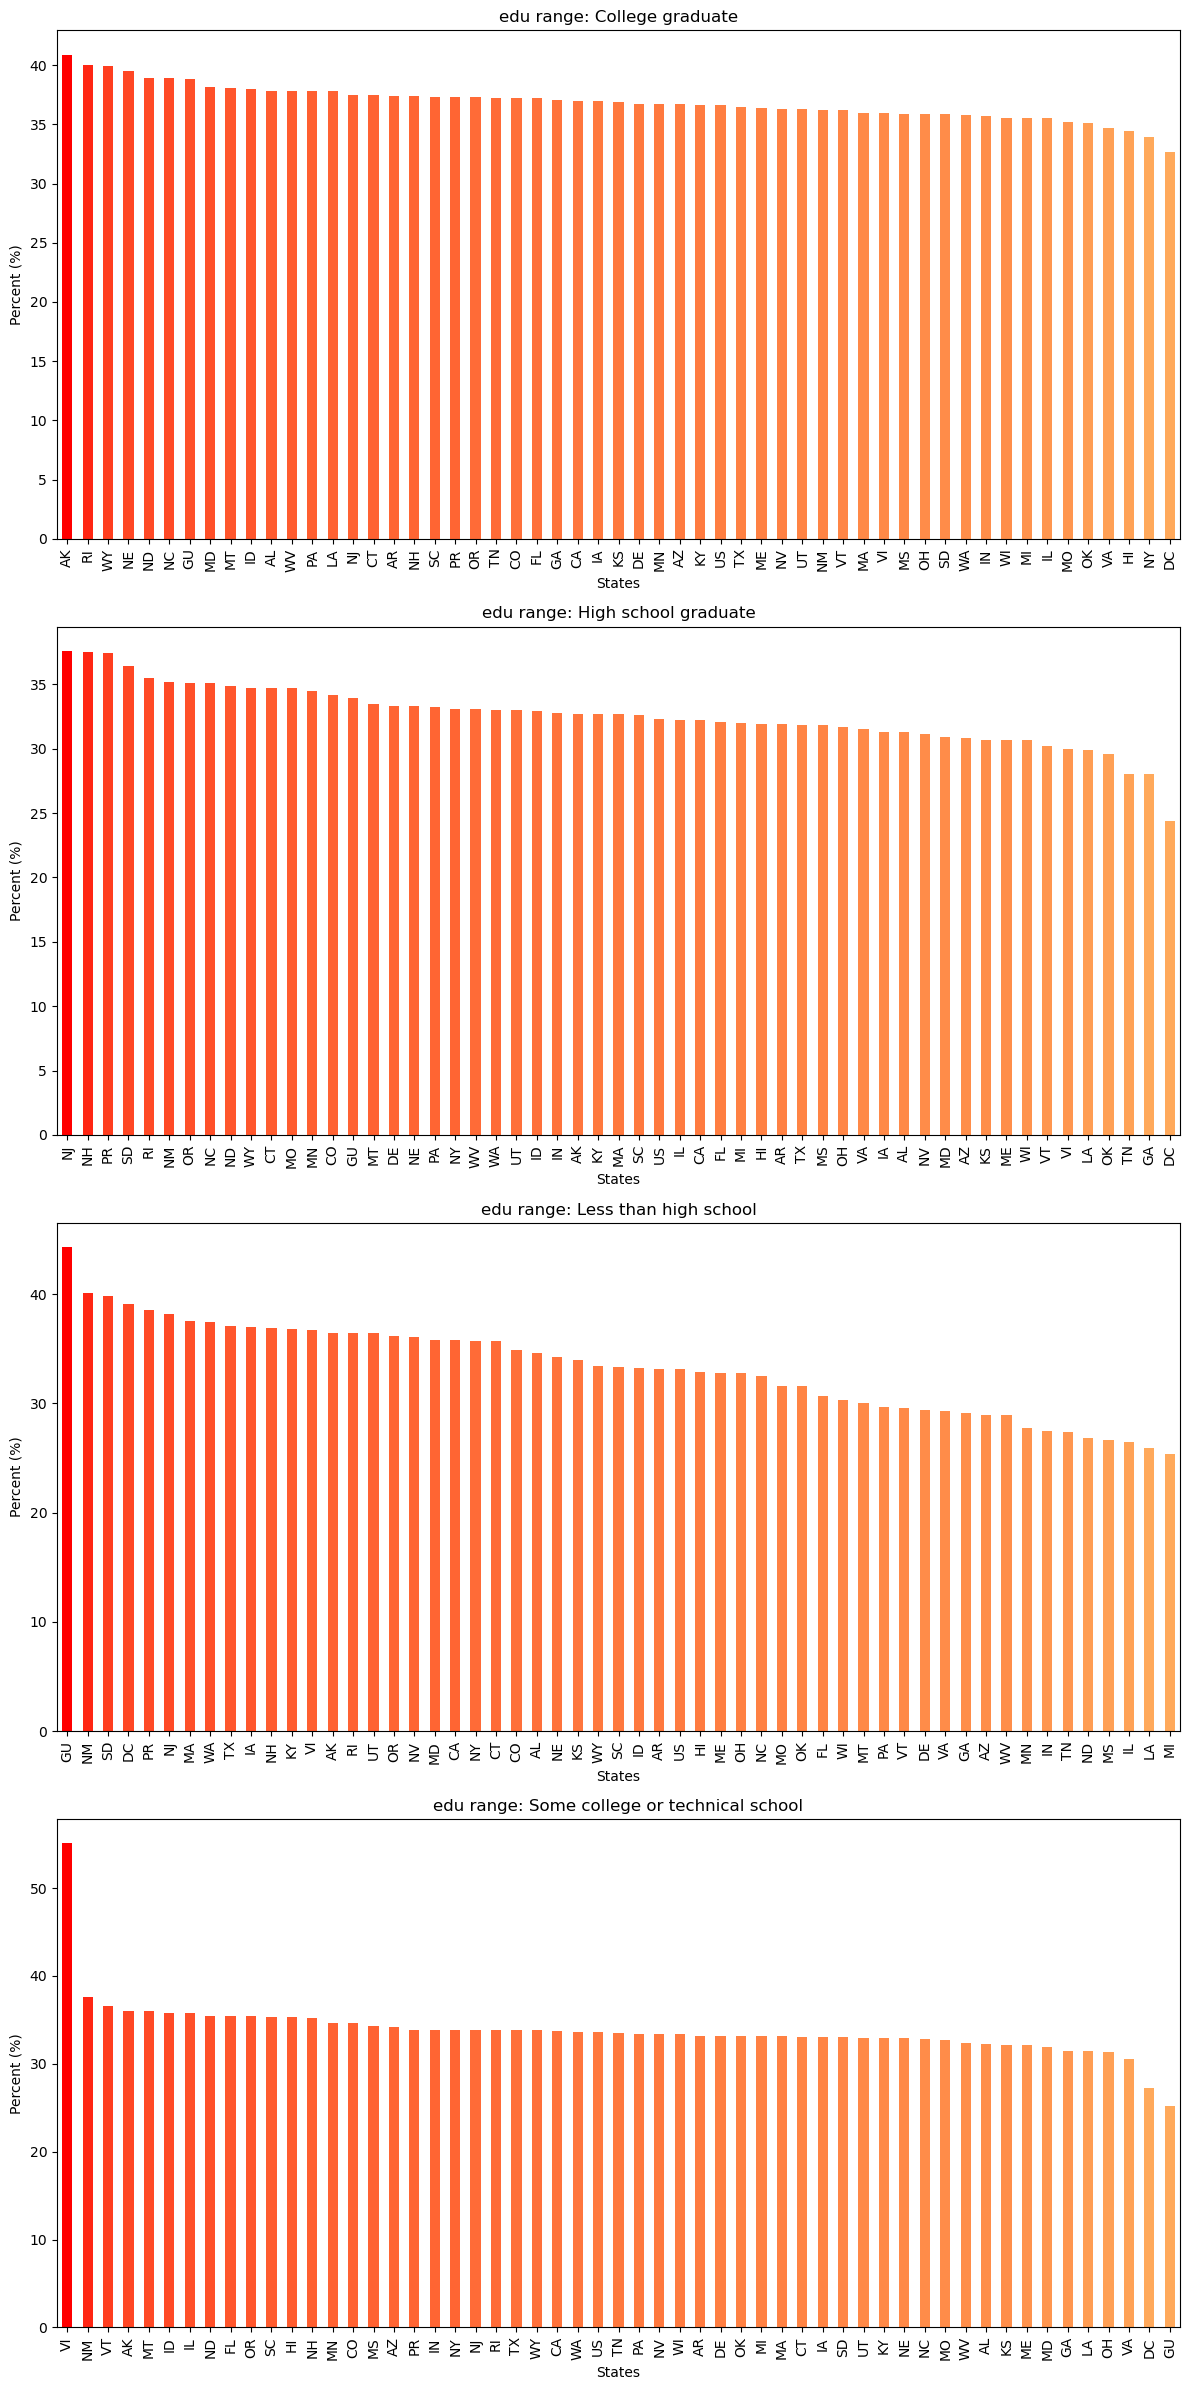

In [14]:
# Education
q037_2022_states_edu = q037_2022.loc[q037_2022["StratificationCategoryId1"] == "EDU"]
q037_2022_states_edu.to_csv("q037_2022_states_edu.csv", index=False)

# Get unique values of edu range
edu_ranges = q037_2022_states_edu["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(edu_ranges)
num_cols = 1  # Each edu range will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique edu range
for i, edu in enumerate(edu_ranges):
    # Filter the DataFrame for the current edu range
    filtered_data = q037_2022_states_edu[q037_2022_states_edu["Stratification1"] == edu]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current edu range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'edu range: {edu}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

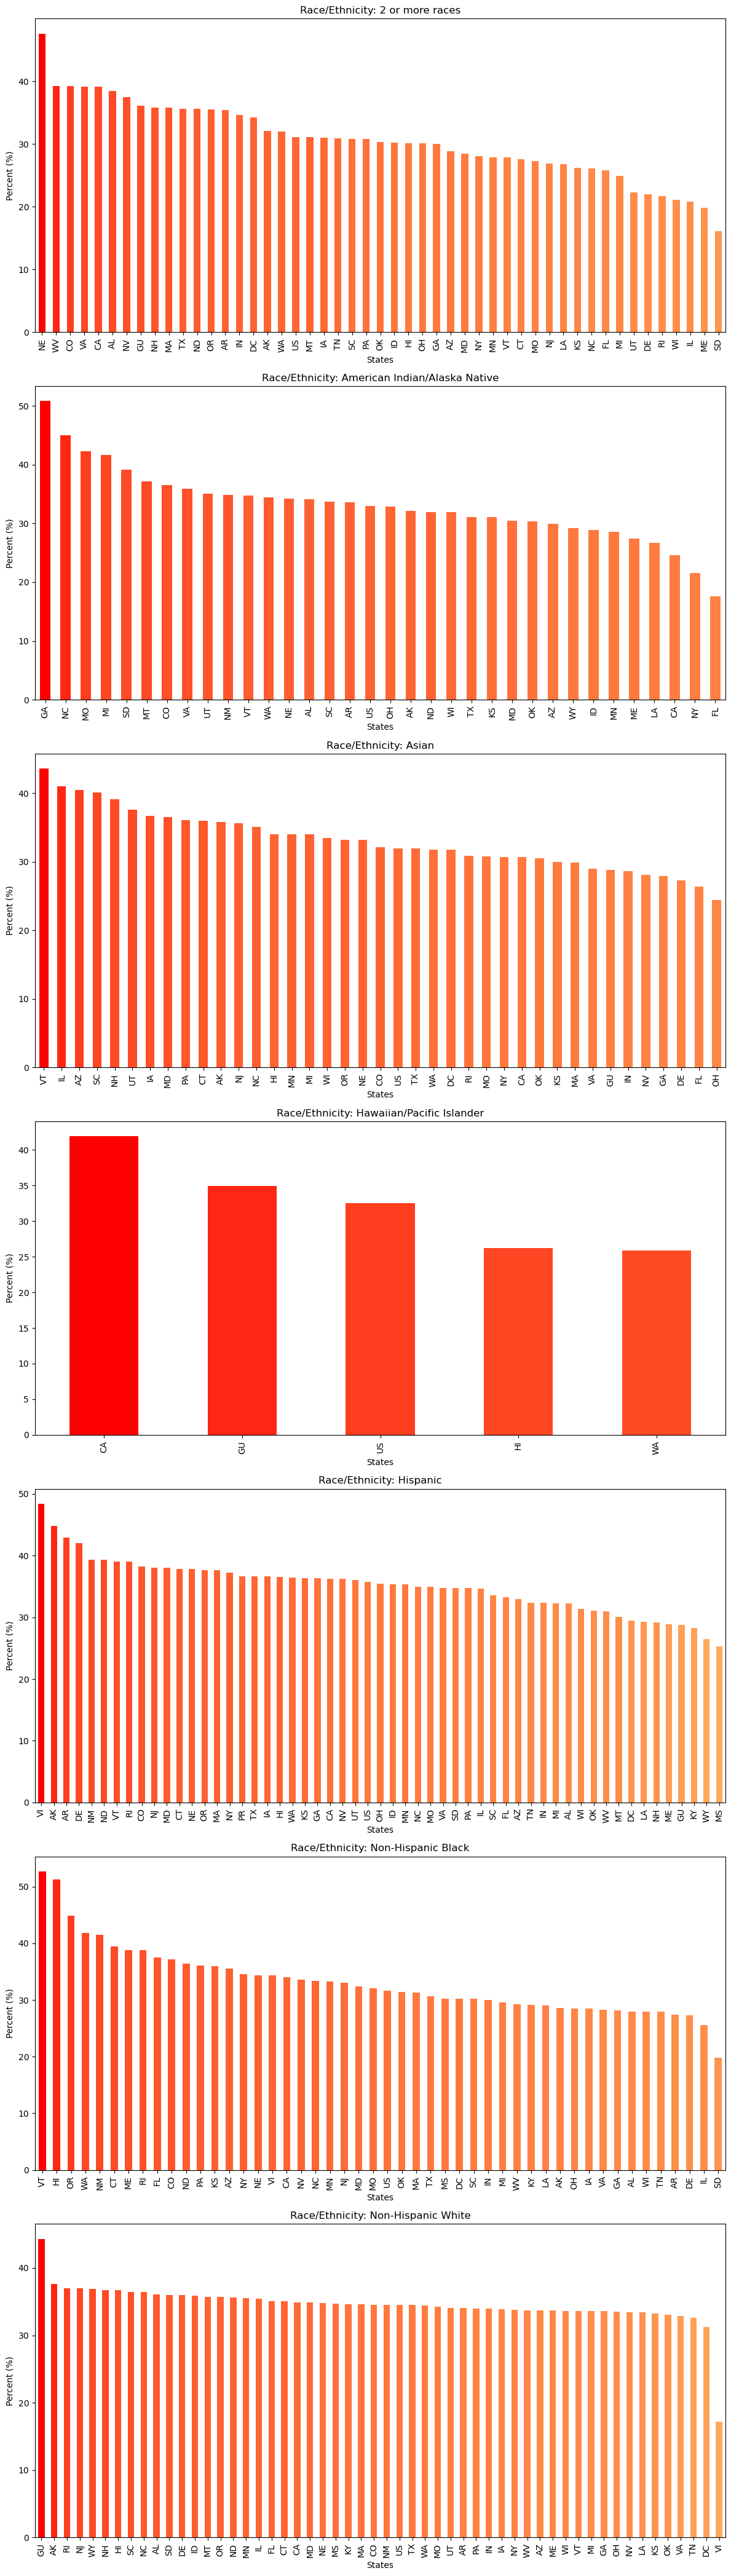

In [15]:
# Race
q037_2022_states_race = q037_2022.loc[q037_2022["StratificationCategoryId1"] == "RACE"]
q037_2022_states_race.to_csv("q037_2022_states_race.csv", index=False)

# Get unique values of race range
races = q037_2022_states_race["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(races)
num_cols = 1  # Each race will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique race range
for i, race in enumerate(races):
    # Filter the DataFrame for the current race 
    filtered_data = q037_2022_states_race[q037_2022_states_race["Stratification1"] == race]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current race range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Race/Ethnicity: {race}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

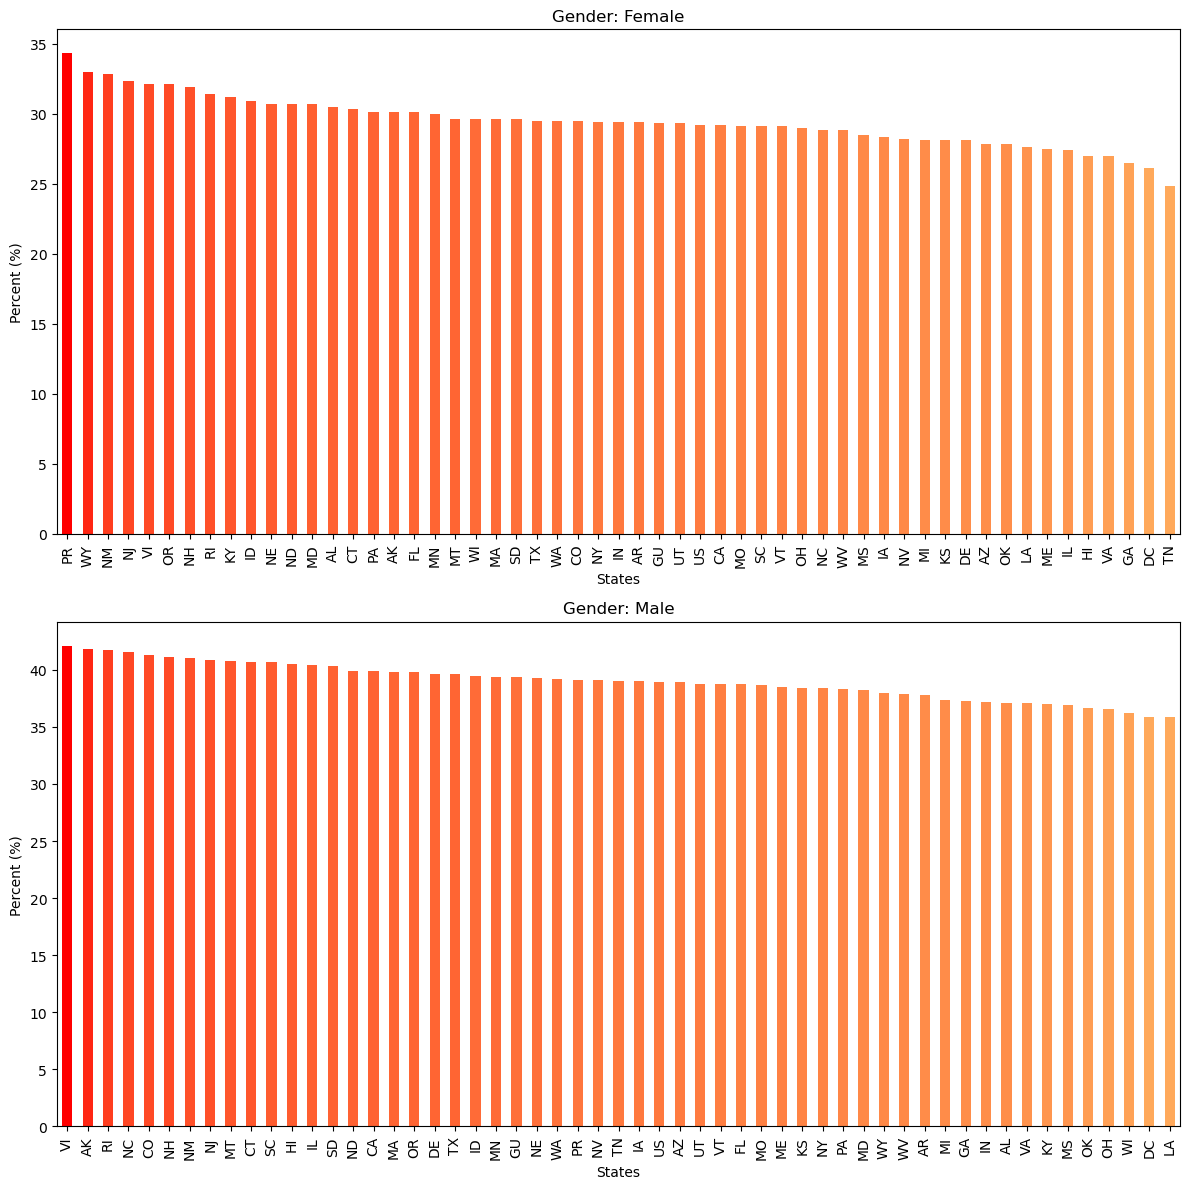

In [16]:
# Genders
q037_2022_states_gen = q037_2022.loc[q037_2022["StratificationCategoryId1"] == "GEN"]
q037_2022_states_gen.to_csv("q037_2022_states_gen.csv", index=False)

# Get unique values of genders
genders = q037_2022_states_gen["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(genders)
num_cols = 1  # Each gen will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique gender
for i, gen in enumerate(genders):
    # Filter the DataFrame for the current gen 
    filtered_data = q037_2022_states_gen[q037_2022_states_gen["Stratification1"] == gen]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current gen range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Gender: {gen}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

# NATIONAL

In [17]:
#filter only National data
q037_natl_df = q037_9cols_sorted[q037_9cols_sorted['LocationDesc'].str.contains('National')].sort_values(by=['YearStart', 'Stratification1'])
q037_natl_df

,YearStart,LocationAbbr,LocationDesc,Data_Value,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
10125,2011,US,National,34.5,Q037,Income,"$15,000 - $24,999",INC,INC1525
10112,2011,US,National,35.5,Q037,Income,"$25,000 - $34,999",INC,INC2535
10155,2011,US,National,37.1,Q037,Income,"$35,000 - $49,999",INC,INC3550
10139,2011,US,National,37.5,Q037,Income,"$50,000 - $74,999",INC,INC5075
10149,2011,US,National,38.3,Q037,Income,"$75,000 or greater",INC,INC75PLUS
...,...,...,...,...,...,...,...,...,...
7147,2022,US,National,38.9,Q037,Gender,Male,GEN,MALE
16491,2022,US,National,31.6,Q037,Race/Ethnicity,Non-Hispanic Black,RACE,RACEBLK
16555,2022,US,National,34.5,Q037,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
5269,2022,US,National,33.6,Q037,Education,Some college or technical school,EDU,EDUCOTEC


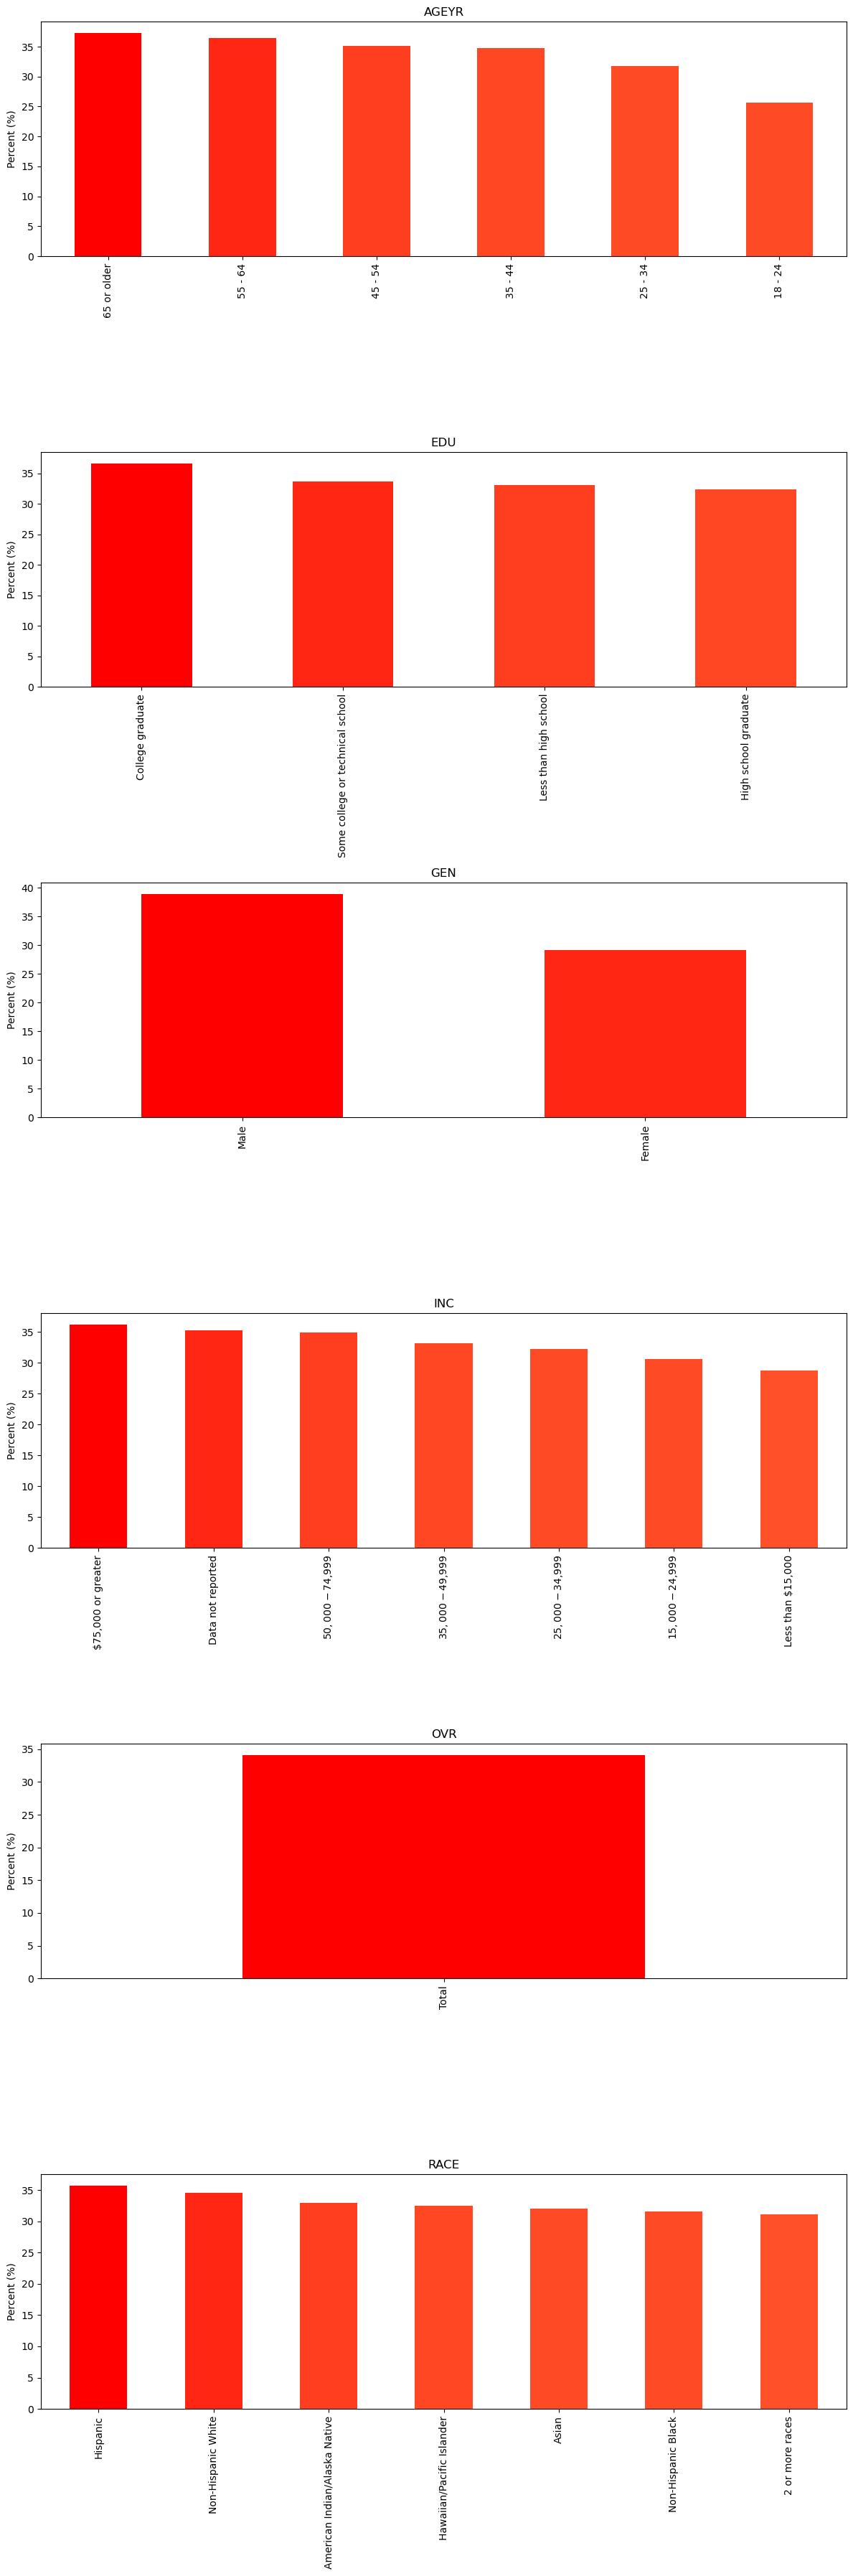

In [18]:
q037_natl_2022 = q037_natl_df.loc[q037_natl_df["YearStart"] == 2022].sort_values(by=['StratificationCategoryId1', 'Stratification1'])
q037_natl_2022.to_csv("q037_natl_2022.csv", index=False)

# Get unique values
strats = q037_natl_2022["StratificationCategoryId1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(strats)
num_cols = 1  # Each gen will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique gender
for i, strat in enumerate(strats):
    # Filter the DataFrame for the current gen 
    filtered_data = q037_natl_2022[q037_natl_2022["StratificationCategoryId1"] == strat]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('Stratification1')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current gen range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'{strat}')
    ax.set_xlabel('')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

# Next: VISUALIZATION WITH HTML AND JAVA SCRIPT